# Day 8: Advanced Grouping and Aggregation with Pandas

Welcome to Day 8! Today, we're diving deep into one of Pandas' most powerful features: the `groupby` operation. This is the cornerstone of data analysis, allowing you to split your data into groups, apply functions to each group independently, and combine the results into a new data structure.

Let's start by importing the necessary libraries. We'll also import `seaborn` just to load a more realistic dataset called 'tips'.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading a Realistic Dataset

Instead of a small, custom DataFrame, let's use the 'tips' dataset. It records tips given by diners, along with details about the meal.

In [ ]:
df = sns.load_dataset("tips")

print("First 5 rows of the Tips dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the Tips dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


---

## Part 1: The GroupBy Object and Basic Aggregations

When you use `.groupby()`, Pandas creates a special `DataFrameGroupBy` object. This object holds all the information about the groups but doesn't show you anything until you apply an aggregation function to it.

**Exercise 1.1:** Group the DataFrame by the 'day' column and calculate the *average* `total_bill` for each day. 

In [9]:
# Your code here
avg_bill_by_day = df.groupby("day", observed=False)["total_bill"].mean()
print(f"The total bill for each day is: {total_bill}")

The total bill for each day is: day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


**Solution 1.1:**

In [10]:
# Solution
avg_bill_by_day = df.groupby("day", observed=True)["total_bill"].mean()
print(avg_bill_by_day)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


### Inspecting Groups

Sometimes it's useful to see the data within a specific group. You can use the `.get_group()` method for this.

**Exercise 1.2:** First, create a `DataFrameGroupBy` object by grouping by 'smoker'. Then, use `.get_group('Yes')` to retrieve all the rows for smokers.

In [29]:
# Your code here
is_smoker = df.groupby('smoker', observed=False)
print(is_smoker.get_group('Yes').head())
# print(is_smoker.get_group('Yes').count())
print(f'\n{is_smoker.get_group('Yes').size}')
print(len(is_smoker.get_group('Yes')))


    total_bill   tip   sex smoker  day    time  size
56       38.01  3.00  Male    Yes  Sat  Dinner     4
58       11.24  1.76  Male    Yes  Sat  Dinner     2
60       20.29  3.21  Male    Yes  Sat  Dinner     2
61       13.81  2.00  Male    Yes  Sat  Dinner     2
62       11.02  1.98  Male    Yes  Sat  Dinner     2

651
93


**Solution 1.2:**

In [30]:
# Solution
grouped_by_smoker = df.groupby("smoker", observed=False)
smoker_data = grouped_by_smoker.get_group("Yes")
print(smoker_data.head())
smokers = df['smoker'].value_counts(normalize=True)
print(smokers)


    total_bill   tip   sex smoker  day    time  size
56       38.01  3.00  Male    Yes  Sat  Dinner     4
58       11.24  1.76  Male    Yes  Sat  Dinner     2
60       20.29  3.21  Male    Yes  Sat  Dinner     2
61       13.81  2.00  Male    Yes  Sat  Dinner     2
62       11.02  1.98  Male    Yes  Sat  Dinner     2
smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64


**Exercise 1.3:** Find the highest tip amount for each day of the week.

In [33]:
# Your code here
max_tip_by_day = df.groupby("day", observed=False)['tip'].max()
print(max_tip_by_day)

day
Thur     6.70
Fri      4.73
Sat     10.00
Sun      6.50
Name: tip, dtype: float64


**Solution 1.3:**

In [35]:
# Solution
max_tip_by_day = df.groupby("day", observed=False)["tip"].max()
print(max_tip_by_day)

day
Thur     6.70
Fri      4.73
Sat     10.00
Sun      6.50
Name: tip, dtype: float64


---

## Part 2: Advanced Aggregation with `.agg()`

The `.agg()` method is your best friend for advanced aggregation. It allows you to apply multiple functions at once and even apply different functions to different columns.

**Exercise 2.1:** For each 'sex', calculate the sum of 'total_bill' and the mean of 'tip' in a single operation.

In [39]:
# Your code here
agg_results = df.groupby("sex", observed=False).agg(
    total_bill_sum=("total_bill", "sum"), mean_tip=("tip", "mean")
)
print(agg_results)

        total_bill_sum  mean_tip
sex                             
Male           3256.82  3.089618
Female         1570.95  2.833448


**Solution 2.1:**

In [40]:
# Solution
agg_results = df.groupby("sex").agg({"total_bill": "sum", "tip": "mean"})
print(agg_results)

        total_bill       tip
sex                         
Male       3256.82  3.089618
Female     1570.95  2.833448


/tmp/ipykernel_6421/829342427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_results = df.groupby("sex").agg({"total_bill": "sum", "tip": "mean"})


**Exercise 2.2 (Challenge):** This is a very common and powerful pattern. Group by 'day' and 'time'. For the 'total_bill', calculate the mean and standard deviation. For the 'tip', find the minimum and maximum values. **Bonus:** Rename the columns to be more descriptive (e.g., 'avg_bill', 'std_bill', 'min_tip', 'max_tip').

In [ ]:
# Your code here
detailed_agg = df.groupby(["day", "time"], observed=True).agg(
    avg_bill=("total_bill", "mean"),
    std_bill=("total_bill", "std"),
    min_tip=("tip", "min"),
    max_tip=("tip", "max")
)
print(detailed_agg)

**Solution 2.2:**

In [ ]:
# Solution
detailed_agg = df.groupby(["day", "time"], observed=True).agg(
    avg_bill=("total_bill", "mean"),
    std_bill=("total_bill", "std"),
    min_tip=("tip", "min"),
    max_tip=("tip", "max"),
)
print(detailed_agg)

              avg_bill  std_bill  min_tip  max_tip
day  time                                         
Thur Lunch   17.664754  7.950334     1.25     6.70
     Dinner  18.780000       NaN     3.00     3.00
Fri  Lunch   12.845714  2.842228     1.58     3.48
     Dinner  19.663333  9.471753     1.00     4.73
Sat  Dinner  20.441379  9.480419     1.00    10.00
Sun  Dinner  21.410000  8.832122     1.01     6.50


**Exercise 2.3 (Visualization):** Let's visualize the results from Exercise 1.1. Create a bar chart showing the average total bill for each day.

In [ ]:
# Your code here
# Hint: The result of your groupby operation is a Pandas Series, which can be plotted directly.
plt.bar(x=avg_bill_by_day.index, height=avg_bill_by_day.values, color="skyblue", edgecolor="black")
plt.grid(axis="y", linestyle="--")
plt.title("Average Bill By Day")
plt.xlabel("Day")
plt.ylabel("Bill($)")

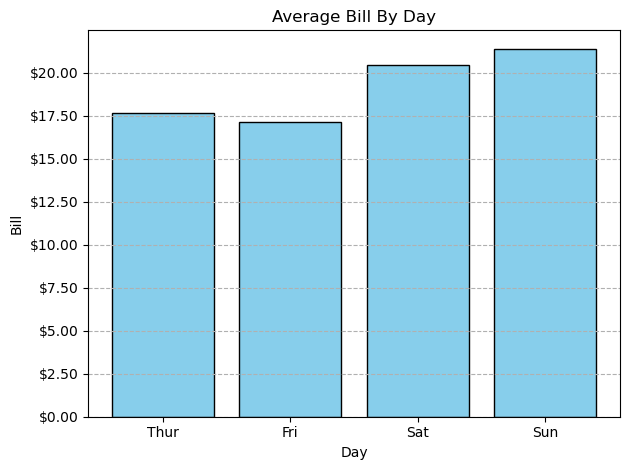

In [61]:
from matplotlib.ticker import FuncFormatter
x = avg_bill_by_day.index
y = avg_bill_by_day.values

plt.bar(x=x,
        height=y,
        color="skyblue",
        edgecolor="black")

ax = plt.gca()

def fmt_dollar(value, pos):
    """Return a string like `$12.34`."""
    return f"${value:,.2f}"      

ax.yaxis.set_major_formatter(FuncFormatter(fmt_dollar))

plt.grid(axis="y", linestyle="--")
plt.title("Average Bill By Day")
plt.xlabel("Day")
plt.ylabel("Bill")

plt.tight_layout()
plt.show()


**Solution 2.3:**

/tmp/ipykernel_6421/3575189794.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill_by_day = df.groupby("day")["total_bill"].mean()


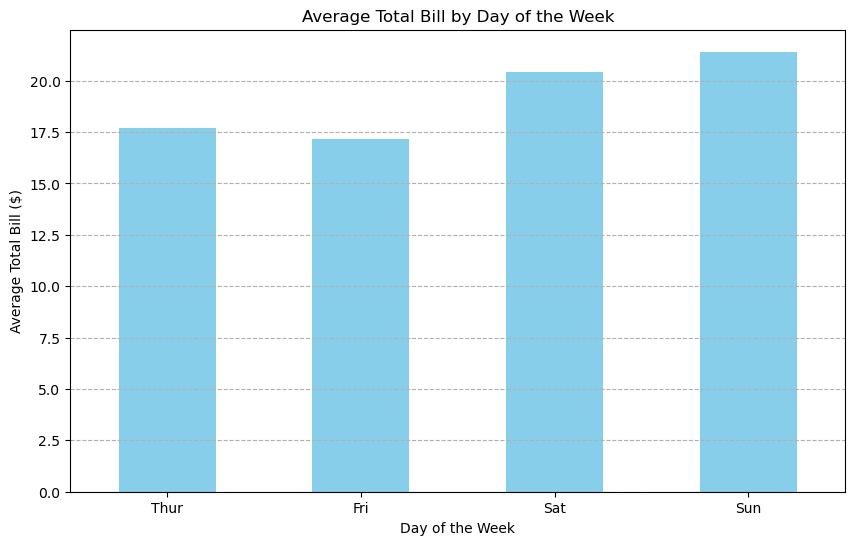

In [60]:
# Solution
avg_bill_by_day = df.groupby("day")["total_bill"].mean()

avg_bill_by_day.plot(kind="bar", figsize=(10, 6), color="skyblue")

plt.title("Average Total Bill by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Total Bill ($)")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis="y", linestyle="--")
plt.show()

---

## Part 3: Handling the Index (`as_index=False` and `reset_index`)

By default, `groupby` makes the grouping columns the index of the resulting DataFrame. Often, you want to keep them as regular columns. You can do this with `as_index=False` or by calling `.reset_index()` on the result.

**Exercise 3.1:** Repeat the aggregation from Exercise 2.2, but this time, keep 'day' and 'time' as regular columns in the final DataFrame by using `as_index=False`.

In [71]:
# Your code here
df["day"] = df["day"].astype(str)
df["time"] = df["time"].astype(str)
flat_agg = df.groupby(["day", "time"], as_index=False).agg(
    avg_bill=("total_bill", "mean"),
    std_bill=("total_bill", "std"),
    min_tip=("tip", "min"),
    max_tip=("tip", "max"),
)
print(flat_agg)

    day    time   avg_bill  std_bill  min_tip  max_tip
0   Fri  Dinner  19.663333  9.471753     1.00     4.73
1   Fri   Lunch  12.845714  2.842228     1.58     3.48
2   Sat  Dinner  20.441379  9.480419     1.00    10.00
3   Sun  Dinner  21.410000  8.832122     1.01     6.50
4  Thur  Dinner  18.780000       NaN     3.00     3.00
5  Thur   Lunch  17.664754  7.950334     1.25     6.70


**Solution 3.1:**

In [75]:
# Solution
df["day"] = df["day"].astype(str)
df["time"] = df["time"].astype(str)
flat_agg = df.groupby(["day", "time"], as_index=False).agg(
    avg_bill=("total_bill", "mean"),
    std_bill=("total_bill", "std"),
    min_tip=("tip", "min"),
    max_tip=("tip", "max"),
)

print(flat_agg)

    day    time   avg_bill  std_bill  min_tip  max_tip
0   Fri  Dinner  19.663333  9.471753     1.00     4.73
1   Fri   Lunch  12.845714  2.842228     1.58     3.48
2   Sat  Dinner  20.441379  9.480419     1.00    10.00
3   Sun  Dinner  21.410000  8.832122     1.01     6.50
4  Thur  Dinner  18.780000       NaN     3.00     3.00
5  Thur   Lunch  17.664754  7.950334     1.25     6.70


---

## Part 4: Beyond Aggregation - `transform` and `filter`

Grouping isn't just for summarizing. You can also use it to create new features or filter your data.

### `transform`
`transform` returns a Series that has the same index as the original DataFrame, making it perfect for creating new columns.

**Exercise 4.1:** Create a new column in the original DataFrame called `avg_bill_for_day` that contains the average `total_bill` for the day that each row's transaction occurred on. 

In [81]:
# Your code here
df["avg_bill_for_day"]= df.groupby("day")["total_bill"].transform("mean")
print(df.tail(10))

     total_bill   tip     sex smoker   day    time  size  avg_bill_for_day
234       15.53  3.00    Male    Yes   Sat  Dinner     2         20.441379
235       10.07  1.25    Male     No   Sat  Dinner     2         20.441379
236       12.60  1.00    Male    Yes   Sat  Dinner     2         20.441379
237       32.83  1.17    Male    Yes   Sat  Dinner     2         20.441379
238       35.83  4.67  Female     No   Sat  Dinner     3         20.441379
239       29.03  5.92    Male     No   Sat  Dinner     3         20.441379
240       27.18  2.00  Female    Yes   Sat  Dinner     2         20.441379
241       22.67  2.00    Male    Yes   Sat  Dinner     2         20.441379
242       17.82  1.75    Male     No   Sat  Dinner     2         20.441379
243       18.78  3.00  Female     No  Thur  Dinner     2         17.682742


**Solution 4.1:**

In [78]:
# Solution
df["avg_bill_for_day"] = df.groupby("day")["total_bill"].transform("mean")
print(df.head())

   total_bill   tip     sex smoker  day    time  size  avg_bill_for_day
0       16.99  1.01  Female     No  Sun  Dinner     2             21.41
1       10.34  1.66    Male     No  Sun  Dinner     3             21.41
2       21.01  3.50    Male     No  Sun  Dinner     3             21.41
3       23.68  3.31    Male     No  Sun  Dinner     2             21.41
4       24.59  3.61  Female     No  Sun  Dinner     4             21.41


### `filter`
`filter` allows you to drop entire groups based on a condition.

**Exercise 4.2:** Filter the DataFrame to only include data for days where the *total number of transactions* (i.e., the count of rows for that day) was greater than 50.

In [85]:
# Your code here
over_50_tpd = df.groupby("day").filter(lambda x: len(x) > 50)

print("Original number of rows:", len(df))
print("number of rows after filtering:", len(over_50_tpd))

print("\nRemaining days in the filtered data:")
print(over_50_tpd["day"].value_counts())

Original number of rows: 244
number of rows after filtering: 225

Remaining days in the filtered data:
day
Sat     87
Sun     76
Thur    62
Name: count, dtype: int64


**Solution 4.2:**

In [86]:
# Solution
# The lambda function is applied to each group (each day's sub-DataFrame)
# It must return True or False. If True, the group is kept.
filtered_df = df.groupby("day").filter(lambda x: len(x) > 50)

print("Original number of rows:", len(df))
print("Number of rows after filtering:", len(filtered_df))

print("\nRemaining days in the filtered data:")
print(filtered_df["day"].value_counts())

Original number of rows: 244
Number of rows after filtering: 225

Remaining days in the filtered data:
day
Sat     87
Sun     76
Thur    62
Name: count, dtype: int64


---

### Incredible work!

You've gone far beyond basic `groupby` and explored some of the most practical and powerful data manipulation techniques in Pandas. The ability to `agg`, `transform`, and `filter` will form the backbone of almost any analysis you perform. Tomorrow, we'll look at how to combine different datasets.